<a href="https://colab.research.google.com/github/dapousman/ComputerVision2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Masukkan nilai kecerahan: 50


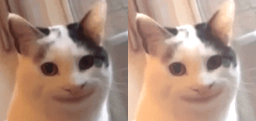

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/catto.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TASK 1
Implementing contrast transformation

Mengubah tingkat kecerahan dan kontras citra
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Masukkan nilai kecerahan: 60
Masukkan nilai kontras(1 - 3): 1.5


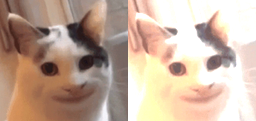

In [ ]:
print('Mengubah tingkat kecerahan dan kontras citra')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan nilai kontras(1 - 3): '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/catto.png')
result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

TASK 2
Implementing transformation of logarithmic brightness

Changing brightness with logarithmic transformation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Enter brightness value: 40


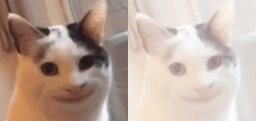

In [ ]:
print('Changing brightness with logarithmic transformation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

try: 
  brightness = int(input('Enter brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/catto.png')

c = 255/np.log(1+np.max(original))

imageLog = c*(np.log(1+original))

imageLog = np.array(imageLog, dtype=np.uint8)

final_frame = cv.hconcat((original, imageLog))
cv2_imshow(final_frame)

TASK 3
Implementing grayscale transformation

a. Averaging

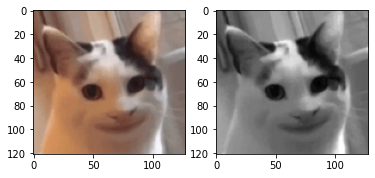

In [ ]:
original = cv.imread('/content/drive/MyDrive/Images/catto.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
averaging = np.mean(original, axis=2)

plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)

plt.imshow(averaging, cmap='gray')

b. Lightness

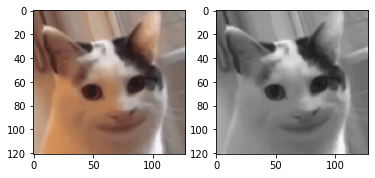

In [8]:
original = cv.imread('/content/drive/MyDrive/Images/catto.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
img = cv.imread('/content/drive/MyDrive/Images/catto.png')
img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
img[:] = np.max(img, axis=-1, keepdims=10)/2+np.min(img, axis=-1, keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(img)

c. Luminance

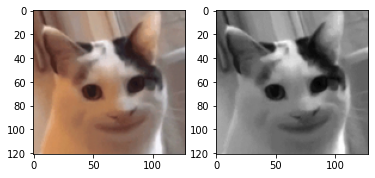

In [ ]:
original = cv.imread('/content/drive/MyDrive/Images/catto.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

luminance = 0.21*R + 0.72*G + 0.07*B
plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)
plt.imshow(luminance, cmap='gray')

TASK 4 
Show certain colors in the image

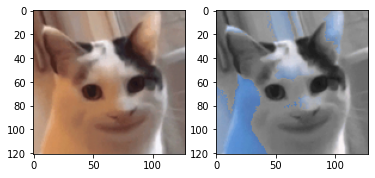

In [13]:
original = cv.imread('/content/drive/MyDrive/Images/catto.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
subject = cv.imread('/content/drive/MyDrive/Images/catto.png')
ret, mask = cv.threshold(subject[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(subject)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(subject, mask3)

gray = cv.cvtColor(subject, cv.COLOR_BGR2GRAY)
subject = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(subject, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(out, cmap='gray')